In [72]:
import os 
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [73]:
print (os.getcwd())
train,test,valid = os.listdir("./")
test,train,valid



/kaggle/input/genderdetectionface/dataset1/dataset1


('test', 'train', 'valid')

In [74]:
os.chdir('./train')
train_man, train_woman=os.listdir('./')
train_man, train_woman

('woman', 'man')

In [75]:
#Getting the names of the files

train_man_names = os.listdir(train_man)
print(train_man_names[:10])


train_woman_names = os.listdir(train_woman)
print(train_man_names[:10])



['face_493.jpg', 'face_904.jpg', 'face_865.jpg', 'face_415.jpg', 'face_677.jpg', 'face_656.jpg', 'face_914.jpg', 'face_1164.jpg', 'face_1003.jpg', 'face_1159.jpg']
['face_493.jpg', 'face_904.jpg', 'face_865.jpg', 'face_415.jpg', 'face_677.jpg', 'face_656.jpg', 'face_914.jpg', 'face_1164.jpg', 'face_1003.jpg', 'face_1159.jpg']


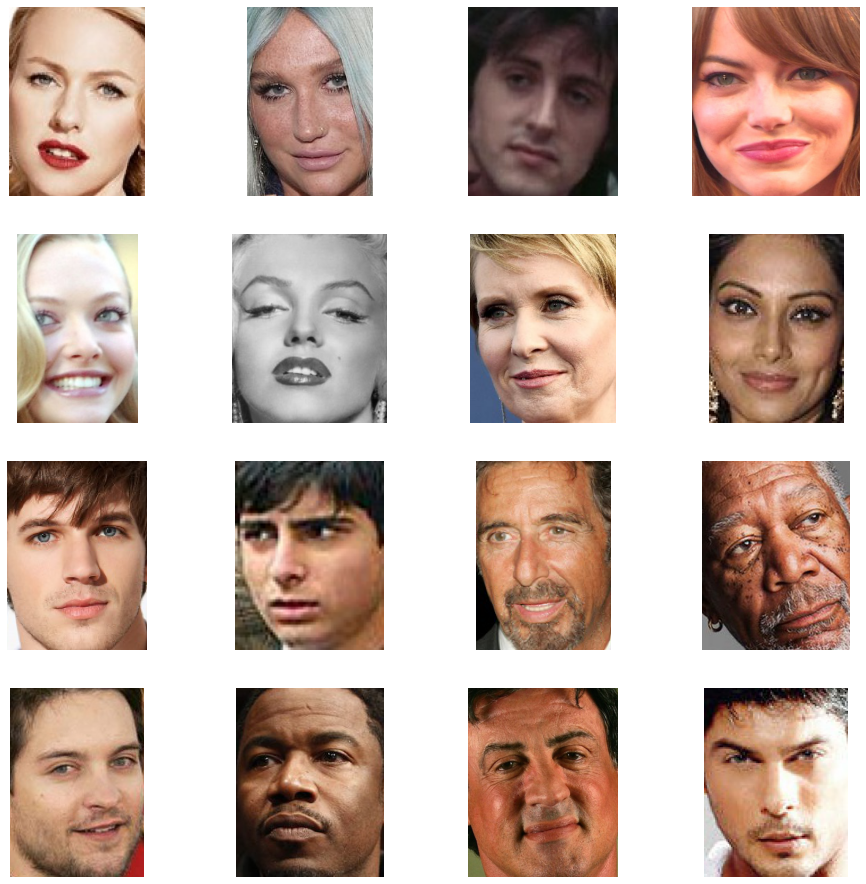

In [76]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

#Now, display a batch of 8 man and 8 woman pictures. You can rerun the cell to see a fresh batch each time:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_man_pix = [os.path.join(train_man, fname) 
                for fname in train_man_names[pic_index-8:pic_index]]
next_woman_pix = [os.path.join(train_woman, fname) 
                for fname in train_woman_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_man_pix+next_woman_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [77]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

# Data Preprossecing and Generators

In [78]:
os.chdir('../') 
print(os.listdir())


['train', 'test', 'valid']


In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train',  # This is the source directory for training images 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './valid',  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')






Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


# Training

In [80]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Train for 8 steps, validate for 8 steps
Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 1.0418 - acc: 0.5000 - val_loss: 0.6890 - val_acc: 0.5078
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.6968 - acc: 0.5625 - val_loss: 0.6704 - val_acc: 0.6367
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.6690 - acc: 0.6615 - val_loss: 0.6039 - val_acc: 0.7070
Epoch 4/20
8/8 [==============================] - 16s 2s/step - loss: 0.7862 - acc: 0.6328 - val_loss: 0.6135 - val_acc: 0.6641
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.5700 - acc: 0.7010 - val_loss: 0.5698 - val_acc: 0.6602
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.5370 - acc: 0.7229 - val_loss: 0.5286 - val_acc: 0.7891
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.5711 - acc: 0.7146 - val_loss: 0.5704 - val_acc: 0.7148
Epoch 8/20
8/8 [==============================] - 16s 2s/step - 

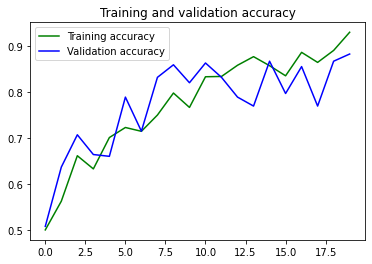

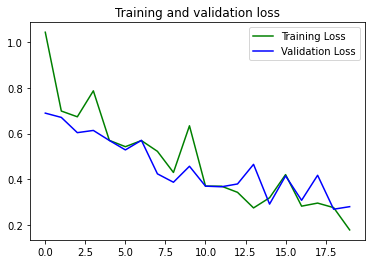

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()